# Overview for the grades of the abitur years from 2006 to 2022

In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import src.data_lit_covid_school as dlcs
import os
import matplotlib.pyplot as plt

## Load data

In [84]:
import re
def load_grades_per_year(path=os.path.join(dlcs.PROJECT_PATH, "data", "grades"), pattern=r".*_grades.csv"):
    # Specific file name pattern
    file_name_pattern = re.compile(pattern)
    # Get a list of all files in the directory matching the pattern
    files = [file for file in os.listdir(path) if file_name_pattern.match(file)]
    grades_per_year = []

    # Load each file into a separate dataframe
    for file in files:
        file_path = os.path.join(path, file)
        dataframe_name = int(os.path.splitext(file)[0].split("_")[0]) + 1 # The year of the exam
        df = pd.read_csv(file_path, index_col=1)
        df = df.drop(columns=['Unnamed: 0'])
        df["File"] = dataframe_name
        grades_per_year.append(df)

    multiindex_df = pd.concat(grades_per_year, keys=[df['File'].iloc[0] for df in grades_per_year]).drop(columns="File")
    
    return multiindex_df

grades = load_grades_per_year()
fail = load_grades_per_year(pattern=r".*_grades_fail.csv")
grades
fail

BW            BY            BE  \
     Meta                                                                 
2015 - bestanden               48228.000000  41239.000000  14954.000000   
     - nicht bestanden (abs.)   1437.000000   1419.000000    713.000000   
     - nicht bestanden (%)         2.893386      3.326457      4.550967   
     Notenmittel                   2.455839      2.325018      2.423994   
2016 - bestanden               51101.000000  42032.000000  15876.000000   
...                                     ...           ...           ...   
2008 Notenmittel                   2.399712      2.426404      2.568393   
2009 - bestanden               43324.000000  33456.000000  13818.000000   
     - nicht bestanden (abs.)    863.000000    329.000000    891.000000   
     - nicht bestanden (%)         1.953063      0.973805      6.057516   
     Notenmittel                   2.397059      2.414021      2.542423   

                                         BB           HB           HH  \
     Meta                                                               
2015 - bestanden                6932.000000  3055.000000  8816.000000   
     - nicht bestanden (abs.)    319.000000   161.000000   343.000000   
     - nicht bestanden (%)         4.399393     5.006219     3.744950   
     Notenmittel                   2.308958     2.456334     2.431715   
2016 - bestanden                8062.000000  3235.000000  9451.000000   
...                                     ...          ...          ...   
2008 Notenmittel                   2.465812     2.468288     2.562962   
2009 - bestanden               11848.000000  2717.000000  5856.000000   
     - nicht bestanden (abs.)    519.000000    82.000000   160.000000   
     - nicht bestanden (%)         4.196652     2.929618     2.659574   
     Notenmittel                   2.418746     2.447037     2.528108   

                                         HE           MV            NI  \
     Meta                                                                
2015 - bestanden               29147.000000  3512.000000  32387.000000   
     - nicht bestanden (abs.)    864.000000   245.000000   1488.000000   
     - nicht bestanden (%)         2.878944     6.521161      4.392620   
     Notenmittel                   2.425176     2.367995      2.607750   
2016 - bestanden               25574.000000  4092.000000  33770.000000   
...                                     ...          ...           ...   
2008 Notenmittel                   2.470603     2.398308      2.710509   
2009 - bestanden               21286.000000  4313.000000  25458.000000   
     - nicht bestanden (abs.)    603.000000   146.000000    896.000000   
     - nicht bestanden (%)         2.754808     3.274277      3.399863   
     Notenmittel                   2.455689     2.370114      2.690797   

                                         NW            RP           SL  \
     Meta                                                                
2015 - bestanden               85398.000000  16272.000000  3565.000000   
     - nicht bestanden (abs.)   2429.000000    375.000000    94.000000   
     - nicht bestanden (%)         2.765664      2.252658     2.569008   
     Notenmittel                   2.498030      2.538188     2.436466   
2016 - bestanden               86347.000000  16969.000000  3875.000000   
...                                     ...           ...          ...   
2008 Notenmittel                   2.637675      2.626894     2.510605   
2009 - bestanden               69020.000000  14650.000000  3029.000000   
     - nicht bestanden (abs.)   1771.000000    206.000000    90.000000   
     - nicht bestanden (%)         2.501730      1.386645     2.885540   
     Notenmittel                   2.631601      2.623775     2.495081   

                                          N           ST            SH  \
     Meta                                                                
2015 - bestanden                8706.0000

In [85]:
grades_flat = grades.unstack(0)
fail_flat = fail.unstack(0)
grades_flat
fail_flat

BW                              \
                                  2015          2016          2017   
Meta                                                                 
- bestanden               48228.000000  51101.000000  51197.000000   
- nicht bestanden (abs.)   1437.000000   1299.000000   1395.000000   
- nicht bestanden (%)         2.893386      2.479008      2.652495   
Notenmittel                   2.455839      2.436089      2.430781   

                                                                    \
                                  2018          2019          2020   
Meta                                                                 
- bestanden               50150.000000  49339.000000  47436.000000   
- nicht bestanden (abs.)   1574.000000   1813.000000   1501.000000   
- nicht bestanden (%)         3.043075      3.544338      3.067209   
Notenmittel                   2.423057      2.435941      2.408555   

                                                                    \
                                  2021          2022          2010   
Meta                                                                 
- bestanden               44975.000000  42464.000000  45080.000000   
- nicht bestanden (abs.)    928.000000   1043.000000    618.000000   
- nicht bestanden (%)         2.021654      2.397315      1.352357   
Notenmittel                   2.376714      2.232425      2.386205   

                                        ...           TH               \
                                  2011  ...         2021         2022   
Meta                                    ...                             
- bestanden               46277.000000  ...  6534.000000  6279.000000   
- nicht bestanden (abs.)   1358.000000  ...   106.000000   110.000000   
- nicht bestanden (%)         2.850845  ...     1.596386     1.721709   
Notenmittel                   2.436431  ...     2.158540     2.055614   

                                                                              \
                                 2010         2011         2012         2013   
Meta                                                                           
- bestanden               8626.000000  6536.000000  5030.000000  5128.000000   
- nicht bestanden (abs.)   158.000000   112.000000    72.000000   108.000000   
- nicht bestanden (%)        1.798725     1.684717     1.411211     2.062643   
Notenmittel                  2.303988     2.300994     2.203439     2.187285   

                                                                              
                                 2014         2007         2008         2009  
Meta                                                                          
- bestanden               5136.000000  9993.000000  9533.000000  9753.000000  
- nicht bestanden (abs.)   126.000000   199.000000   237.000000   176.000000  
- nicht bestanden (%)        2.394527     1.952512     2.425793     1.772585  
Notenmittel                  2.167660     2.327019     2.331826     2.321839  

[4 rows x 256 columns]

## Plot the data

In [86]:
def get_average_grades_by_year_and_state(flat_data: pd.DataFrame, states=["BW"]):
    plot_data: pd.DataFrame = pd.DataFrame()
    for state in states:
        state_data = flat_data[state].copy()
        average_grades_per_year = state_data.apply(lambda col: np.dot(col, state_data.index) / col.sum(), axis=0).sort_index()
        plot_data[state] = average_grades_per_year
    return plot_data.copy()

In [87]:
def get_percentage_failed(flat_data: pd.DataFrame, states=["BW"]):
    plot_data: pd.DataFrame = pd.DataFrame()
    for state in states:
        state_data = flat_data[state].copy()
        plot_data[state] = state_data.loc["- nicht bestanden (%)"]
    return plot_data.sort_index().copy()

In [96]:

def get_number_of_final_kids(flat_data: pd.DataFrame, states=["BW"]):
    plot_data: pd.DataFrame = pd.DataFrame()
    for state in states:
        state_data = flat_data[state].copy()
        base = flat_data[state, flat_data[state].columns.sort_values()[0]]
        base_sum = (base["- bestanden"] + base["- nicht bestanden (abs.)"])
        plot_data[state] = (state_data.loc["- bestanden"] + state_data.loc["- nicht bestanden (abs.)"] - base_sum) / base_sum
    return plot_data.sort_index().copy()

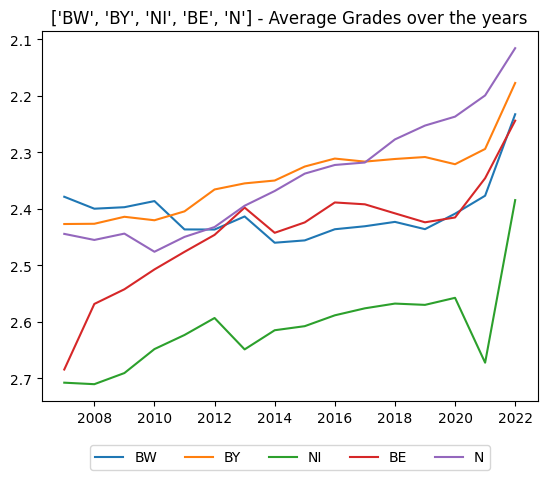

In [97]:
STATES = ["BW", "BY", "NI", "BE", "N"]


fig, axs = plt.subplots(1, 1)
axs.set_title(f"{STATES} - Average Grades over the years")
data = get_average_grades_by_year_and_state(grades_flat, STATES)
axs.plot(data)
axs.invert_yaxis()
axs.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=len(data.columns), labels=data.columns)
plt.show()

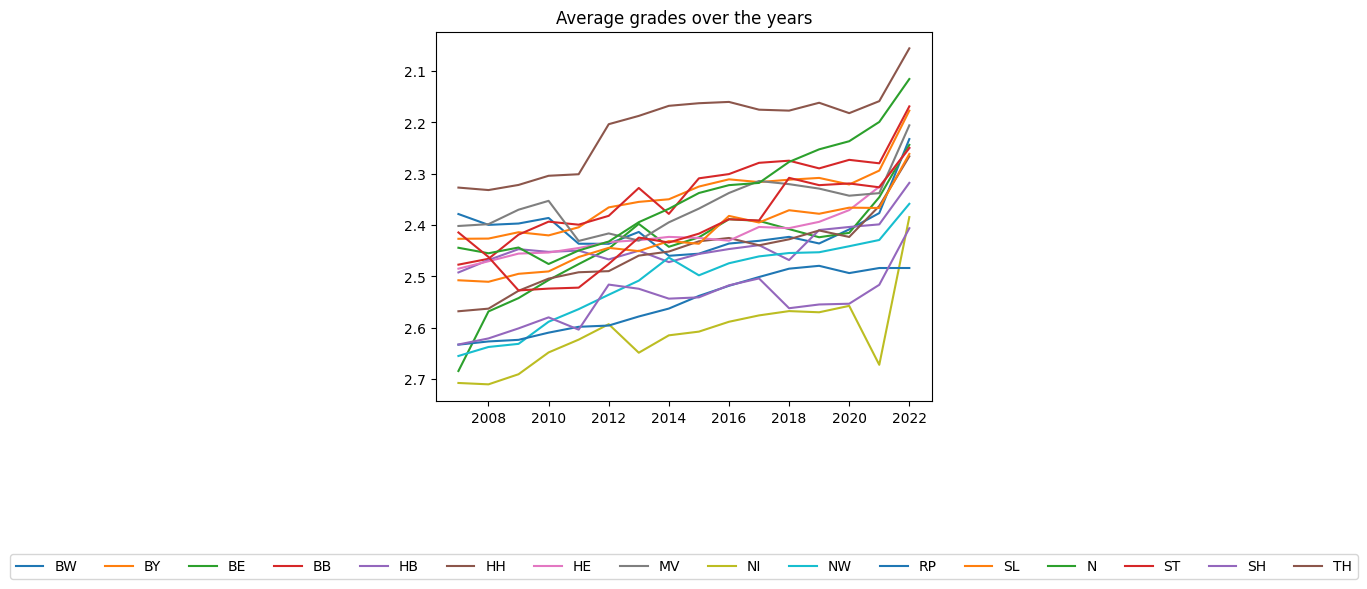

In [98]:

plot_data = get_average_grades_by_year_and_state(grades_flat, grades_flat.columns.get_level_values(0))
fig, axs = plt.subplots(1,1)
ax = axs
ax.set_title('Average grades over the years')
ax.plot(plot_data)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.5), ncol=len(plot_data.columns), labels=plot_data.columns)
# ax.set_ylim((2.1, 2.7))
ax.invert_yaxis()
plt.show()

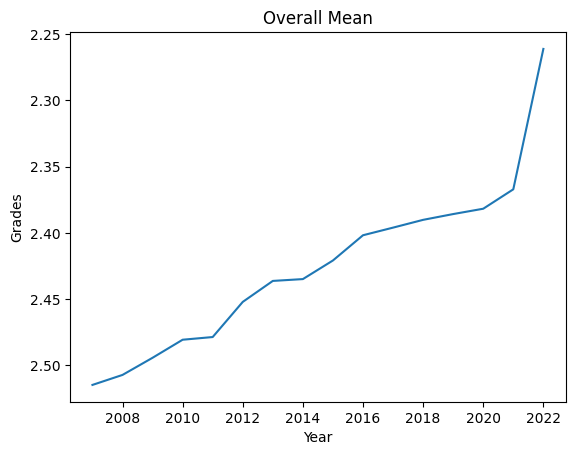

In [99]:
data = get_average_grades_by_year_and_state(grades_flat, grades_flat.columns.get_level_values(0))
overall_mean = data.mean(axis=1)
fig, axs = plt.subplots(1,1)

ax = axs
ax.set_title("Overall Mean")
ax.plot(overall_mean)
ax.set_xlabel("Year")
ax.set_ylabel("Grades")
ax.invert_yaxis()
plt.show()

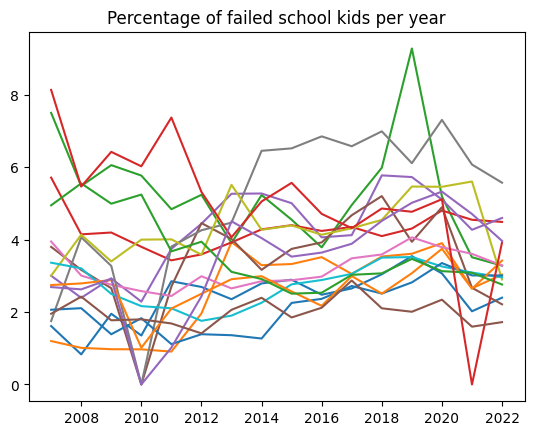

In [100]:
data = get_percentage_failed(fail_flat, fail_flat.columns.get_level_values(0))
fig, ax = plt.subplots(1,1)
ax.plot(data)
ax.set_title("Percentage of failed school kids per year")
plt.show()

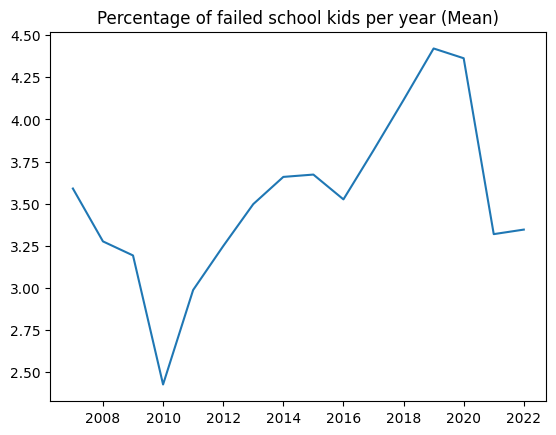

In [101]:
data = get_percentage_failed(fail_flat, fail_flat.columns.get_level_values(0))
data = data.mean(axis=1)
fig, ax = plt.subplots(1,1)
ax.plot(data)
ax.set_title("Percentage of failed school kids per year (Mean)")
plt.show()

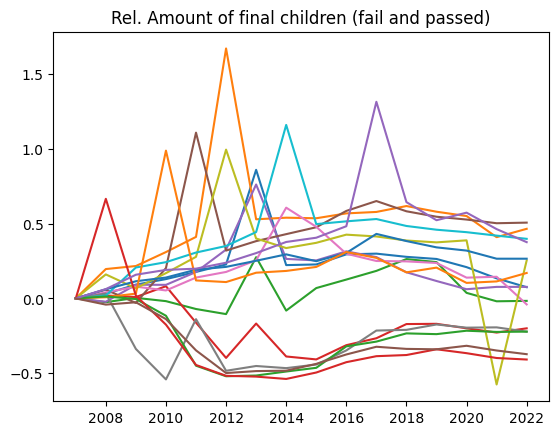

In [104]:
data = get_number_of_final_kids(fail_flat, fail_flat.columns.get_level_values(0))
fig, ax = plt.subplots(1,1)
ax.plot(data)
ax.set_title("Rel. Amount of final children (fail and passed)")
plt.show()

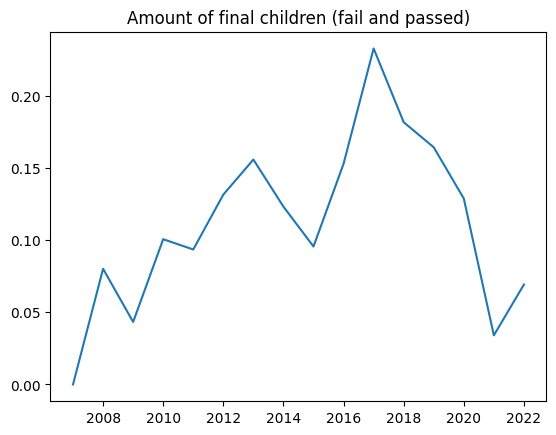

In [103]:
data = get_number_of_final_kids(fail_flat, fail_flat.columns.get_level_values(0))
data = data.mean(axis=1)
fig, ax = plt.subplots(1,1)
ax.plot(data)
ax.set_title("Rel. amount of final children (fail and passed)")
plt.show()